In [1]:
import gym
import ray
from ray.rllib.agents.ppo import PPOTrainer
from scouting_gym.scouting_env_real import ScoutingEnvInference
from gym.envs.registration import register
from IPython.display import clear_output

register(
    id='Scouting-inference-v0',
    entry_point='scouting_gym.scouting_env_real:ScoutingEnvInference'
)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
env = gym.make('Scouting-inference-v0')

print(env.observation_space)

Box(0.0, 1.0, (84, 84, 4), float32)


1.0


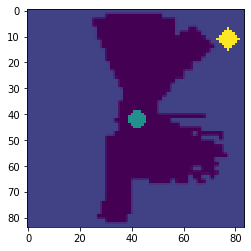

In [3]:
env.target_p = (-4, -4.9)
import matplotlib.pyplot as plt
obs = env.reset()
print(obs.max())
plt.imshow(obs[:, :, 0])

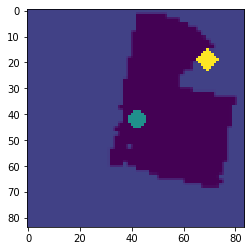

In [5]:
import time
time_now = time.time()
_ = env.reset()
print(time.time()-time_now)
for _ in range(10):
    #obs, reward, done, _ = env.step(1)
    obs, reward, done, _ = env.step(1)

    clear_output(wait=True)
    #plt.imshow(obs[:, :, 0])
    if done:
        print('break')
_ = env.reset()
plt.imshow(obs[:, :, 0])

In [ ]:
plt.imshow(obs[:, :, 0], cmap='gray')

In [ ]:
plt.imshow(obs[:, :, 1], cmap='gray')

In [ ]:
plt.imshow(obs[:, :, 2], cmap='gray')

In [ ]:
plt.imshow(obs[:, :, 3], cmap='gray')

In [ ]:
obs[:, :, 3].mean()

In [4]:
ray.init()

2021-03-03 08:53:37,276	INFO resource_spec.py:223 -- Starting Ray with 7.76 GiB memory available for workers and up to 3.89 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2021-03-03 08:53:37,879	INFO services.py:1191 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '192.168.33.3',
 'raylet_ip_address': '192.168.33.3',
 'redis_address': '192.168.33.3:6379',
 'object_store_address': '/tmp/ray/session_2021-03-03_08-53-37_272686_3609/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-03-03_08-53-37_272686_3609/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2021-03-03_08-53-37_272686_3609'}

In [5]:
config = {
    "env": ScoutingEnvInference,  # or "corridor" if registered above
    # Use GPUs iff `RLLIB_NUM_GPUS` env var set to > 0.

    "num_gpus": 1,
    "num_workers": 1,  # parallelism
}

In [6]:
def load(checkpoint_path, config):
    """
    Load a trained RLlib agent from the specified path. Call this before testing a trained agent.
    :param path: Path pointing to the agent's saved checkpoint (only used for RLlib agents)
    """
    agent = PPOTrainer(config=config)
    agent.restore(checkpoint_path)
    return agent

def test(agent, env):
    """Test trained agent for a single episode. Return the episode reward"""
    # instantiate env class

    # run until episode ends
    episode_reward = 0
    done = False
    obs = env.reset()
    while not done:
        action = agent.compute_action(obs)
        obs, reward, done, info = env.step(action)
        clear_output(wait=True)
        episode_reward += reward
    env.reset()
    return episode_reward

In [7]:
checkpoint_path = '/home/dschori/Downloads/checkpoint_280/checkpoint-280'
checkpoint_path = '/home/dschori/Downloads/checkpoint_126/checkpoint-126'
#checkpoint_path = '/home/dschori/Downloads/checkpoint_184/checkpoint-184'

In [8]:
agent = load(checkpoint_path=checkpoint_path, config=config)

2021-03-03 08:53:39,954	INFO trainer.py:605 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-03-03 08:53:39,956	INFO trainer.py:630 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=3795) WARNING:tensorflow:From /home/dschori/.local/lib/python3.8/site-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=3795) Instructions for updating:
(pid=3795) non-resource variables are not supported in the long term
2021-03-03 08:53:45,584	WARNING util.py:37 -- Install gputil for GPU system monitoring.
2021-03-03 08:53:45,754	INFO trainable.py:472 -- Restored on 192.168.33.3 from checkpoint: /home/dschori/Downloads/checkpoint_126/checkpoint-126
2021-03-03 08:53:45,755	INFO trainable.py:480 -- Current state after restoring: {'_iteration': 126, '_timesteps_total': No

In [ ]:
import time
time_now = time.time()
action = agent.compute_action(env.observation_space.sample())
print(time.time() - time_now)

In [26]:
env.target_p = (-1.35, -1.55)

#env.target_p = (-4.2, -4.8)
env.img_prefix = 'd2_17'

In [28]:
episode_reward = test(agent=agent, env=env)
episode_reward



KeyboardInterrupt: 

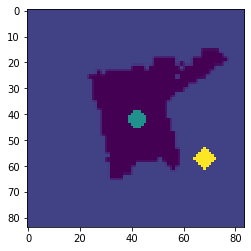

In [27]:
import matplotlib.pyplot as plt
obs = env.reset()
plt.imshow(obs[:, :, 0])

In [30]:
agent.compute_action(env.reset())

2